In [60]:
import matplotlib.pyplot as plt
import re
import os
import sys
import numpy as np
from scipy.stats import norm
from settings_and_potential import *

import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
# nrank = sys.argv[0]
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/kitchen_2d/"
font_size=25
lw=3
s=10
def U(x):
    res = s*(x*x-1)*(x*x-1)
    return res
myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 

#######################################################
##### what do you want to run
#######################################################
## run the sample to check the look of the distributions 

q_noadax,p_noadax,g=openCfile_qp(path+"vec_noada_x.txt")
q_noaday,p_noaday,g=openCfile_qp(path+"vec_noada_y.txt")
q_trx,p_trx,g=openCfile_qp(path+"vec_tr_x.txt")
q_try,p_try,g=openCfile_qp(path+"vec_tr_y.txt")



## Unbalanced double well

The potential is
\begin{equation}
f(x,y) = (dx^2+0.01(y-1)^2)((x-1)^2+by^2)
\end{equation}

The derivative with regards to x is 
$$
\partial_x f(x,y)=2d((x-1)^2+by^2)+(dx^2+0.001(y-1)^2)2(x-1)
$$
and 
$$
\partial_y f(x,y)=0.002(y-1)((x-1)^2+by^2)+(dx^2+0.001(y-1)^2)2by
$$



In [39]:
d=20
b=1


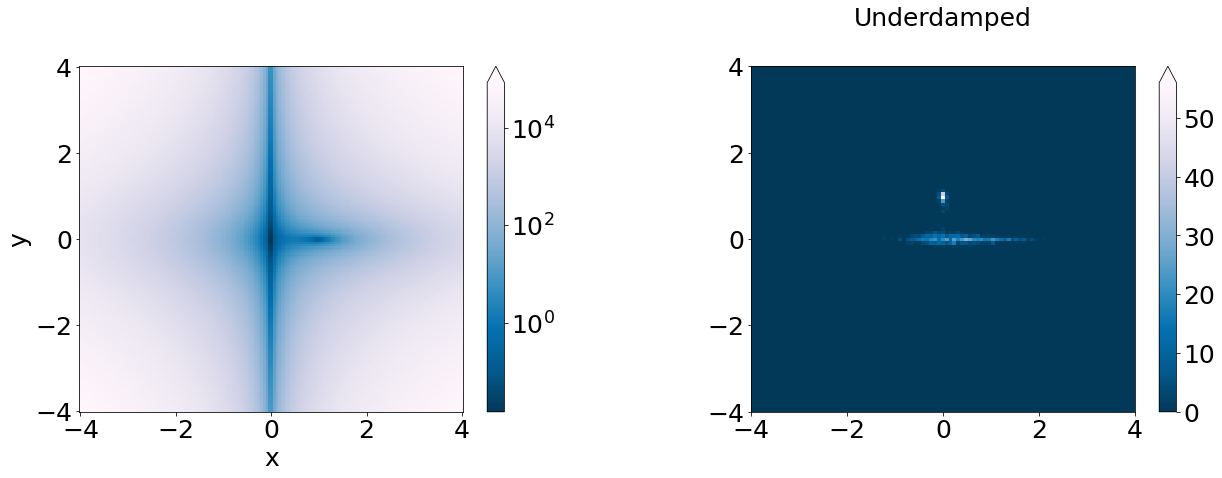

In [67]:
####################
##
#####################
tau=0.1
s=1
fig, (axs)= plt.subplots(1, 2,figsize=(20,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)

######################
# DEFINE THE POTENTIAL
######################

def U(x,y):
    res=(d*x*x+0.001*(y-1)*(y-1))*((x-1)*(x-1)+b*y*y)
    return (res)

# def trypot(x,y):
#     a=5
#     b=0.1
#     c=0.1
#     res=0.1*c*(-0.1 + x) + 0.5*c*(-0.1 + x)**2 + (50*a*b**2 (-50*b + a (-1. + 5*x + 10*y - 50*y**2)))/((100*b + a (1 - 10*y)**2) (50*b + a (1. - 10*x + 50*x**2 - 10*y + 50*y**2))) + (50*a^(3/2) b**2 arct((Sqrt(a) (-1. + 10*x))/np.sqrt(100*b + a (1. - 10*y)**2)))/(100*b + a *(1. - 10*y)**2)**(3/2))

####################
## True distribution
#####################
beta=1/0.1
nbins=150
bound=4
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound,bound,nbins)
X, Y = np.meshgrid(X, Y)
Z =U(X,Y)

pcm = axs[0].pcolor(X, Y, Z,
                   norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                   cmap='PuBu_r', shading='auto')
axs[0].set_xlabel("x",fontsize=font_size)
axs[0].set_ylabel("y",fontsize=font_size)

fig.colorbar(pcm, ax=axs[0], extend='max')


def Utry(x,y):
    res=0
    return (res)

# Z2 =Utry(X,Y)


# pcm = axs[1].pcolor(X, Y, Z2,
#                    norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
#                    cmap='PuBu_r', shading='auto')
# # fig.colorbar(pcm, ax=axs[0], extend='max')

# # pcm = axs[0].pcolor(X, Y, Z, cmap='PuBu_r', shading='auto')
# axs[1].set_xlabel("x",fontsize=font_size)
# axs[1].set_ylabel("y",fontsize=font_size)

# fig.colorbar(pcm, ax=axs[1], extend='max')




# # ####################
# # ## Transformed distribution
# # #####################
# # nbins=100
# xedges = np.linspace(-bound,bound,nbins)
# yedges = np.linspace(-bound,bound,nbins)
# H, xedges, yedges = np.histogram2d(q_trx, q_try, bins=(xedges, yedges),density=True)
# axs[1].set_title('Transformed underdamped',fontsize=font_size,y=1.1)
# X, Y = np.meshgrid(xedges, yedges)
# pcm = axs[1].pcolor(X, Y, H,
#                    norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
#                    cmap='PuBu_r', shading='auto')
# fig.colorbar(pcm, ax=axs[1], extend='max')

####################
## Not adaptive distribution
#####################
nbins=100
xedges = np.linspace(-bound,bound,nbins)
yedges = np.linspace(-bound,bound,nbins)

H, xedges, yedges = np.histogram2d(q_noadax, q_noaday, bins=(xedges, yedges))
H.T
axs[1].set_title('Underdamped',fontsize=font_size,y=1.1)
X, Y = np.meshgrid(xedges, yedges)
axs[1].pcolormesh(X, Y, H, norm=colors.LogNorm(vmin=np.exp(-1), vmax=np.max(H)))
pcm = axs[1].pcolor(X, Y, H, cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=axs[1], extend='max')
plt.show()

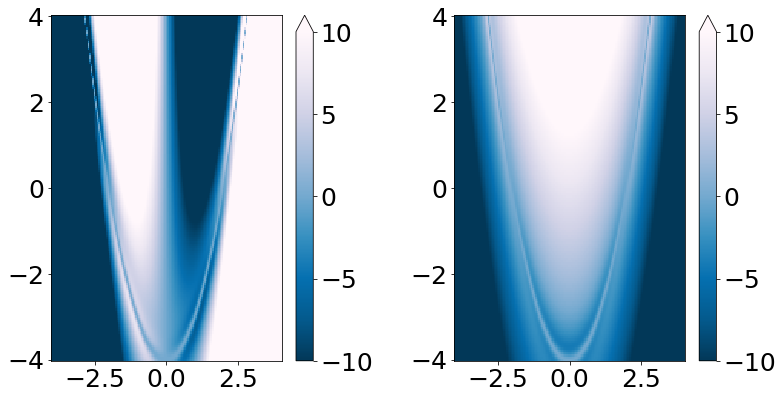

In [4]:
def getp1_x(x,y):
    return -4*x*(y-x*x+4)
def getp1_y(x,y):
    return 2*(y-x*x+4)
def getp2_x(x,y):
    return 4*x*(y+x*x-4)
def getp2_y(x,y):
    return 2*(y+x*x-4)

def Upx(x,y):
    p1=getp1(x,y)
    p2=getp1(x,y)
    p1_p=getp1_x(x,y)
    p2_p=getp2_x(x,y)
    q1_p= (p1_p*(k1*p2-1)+k1*p1*(1+p1)*p2_p)/np.power(1+p2,2)
    q2_p = k2*(k2*p1_p*p2*p2+p1_p*p2+p1*p2_p)/np.power(1+k2*p2,2)
    return q1_p+q2_p

def Upy(x,y):
    p1=getp1(x,y)
    p2=getp1(x,y)
    p1_p=getp1_y(x,y)
    p2_p=getp2_y(x,y)
    q1_p= (p1_p*(k1*p2-1)+k1*p1*(1+p1)*p2_p)/np.power(1+p2,2)
    q2_p = k2*(k2*p1_p*p2*p2+p1_p*p2+p1*p2_p)/np.power(1+k2*p2,2)
    return q1_p+q2_p

#####################
tau=0.1
s=1



####################
## True distribution
#####################
beta=1/0.1
nbins=50
bound=4
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound,bound,nbins)
X, Y = np.meshgrid(X, Y)


fig, (axs)= plt.subplots(1, 2,figsize=(12,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)

####################
## True distribution
#####################
beta=1/0.1
nbins=150
bound=4
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound,bound,nbins)
X, Y = np.meshgrid(X, Y)
Z =Upx(X,Y)

pcm = axs[0].pcolor(X, Y, Z,
                   norm = colors.Normalize(vmin=-10, vmax=10),
                   cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=axs[0], extend='max')

Z =Upy(X,Y)

pcm = axs[1].pcolor(X, Y, Z,
                   norm = colors.Normalize(vmin=-10, vmax=10),
                   cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=axs[1], extend='max')
plt.show()

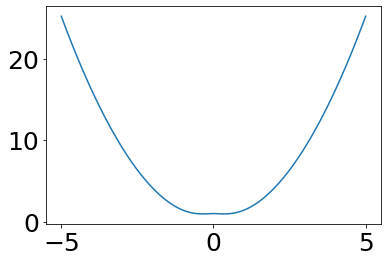

In [138]:
def U(x,y):
    p1=getp1(x,y)
    p2=getp2(x,y)
    res=(1+k1*p1*p2)/(1+p1)+(k2*p1*p2)/(1+k2*p2)
    return (res)

w=np.linspace(-5,5,100)
plt.plot(w,U(-2,w))

## Visualise few trajectories

In [12]:
#/////////////////////////////////////////
#// Anisotropique potential definition //

#define DIVTERM          //define to use
m=5      #     // minimum step scale factor
M=1.5      #       // maximum step scale factor
gamma=0.1         #   // friction coefficient
tau=0.1          #  // 'temperature'
T=50
dt=0.01
numruns= int(T/dt)         # // total number of trajectories
numsam=5  
r=0.01
nsnapshot=5


FileNotFoundError: [Errno 2] No such file or directory: '/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/fewtraj_kitchen/vec_noada_x0.txt'

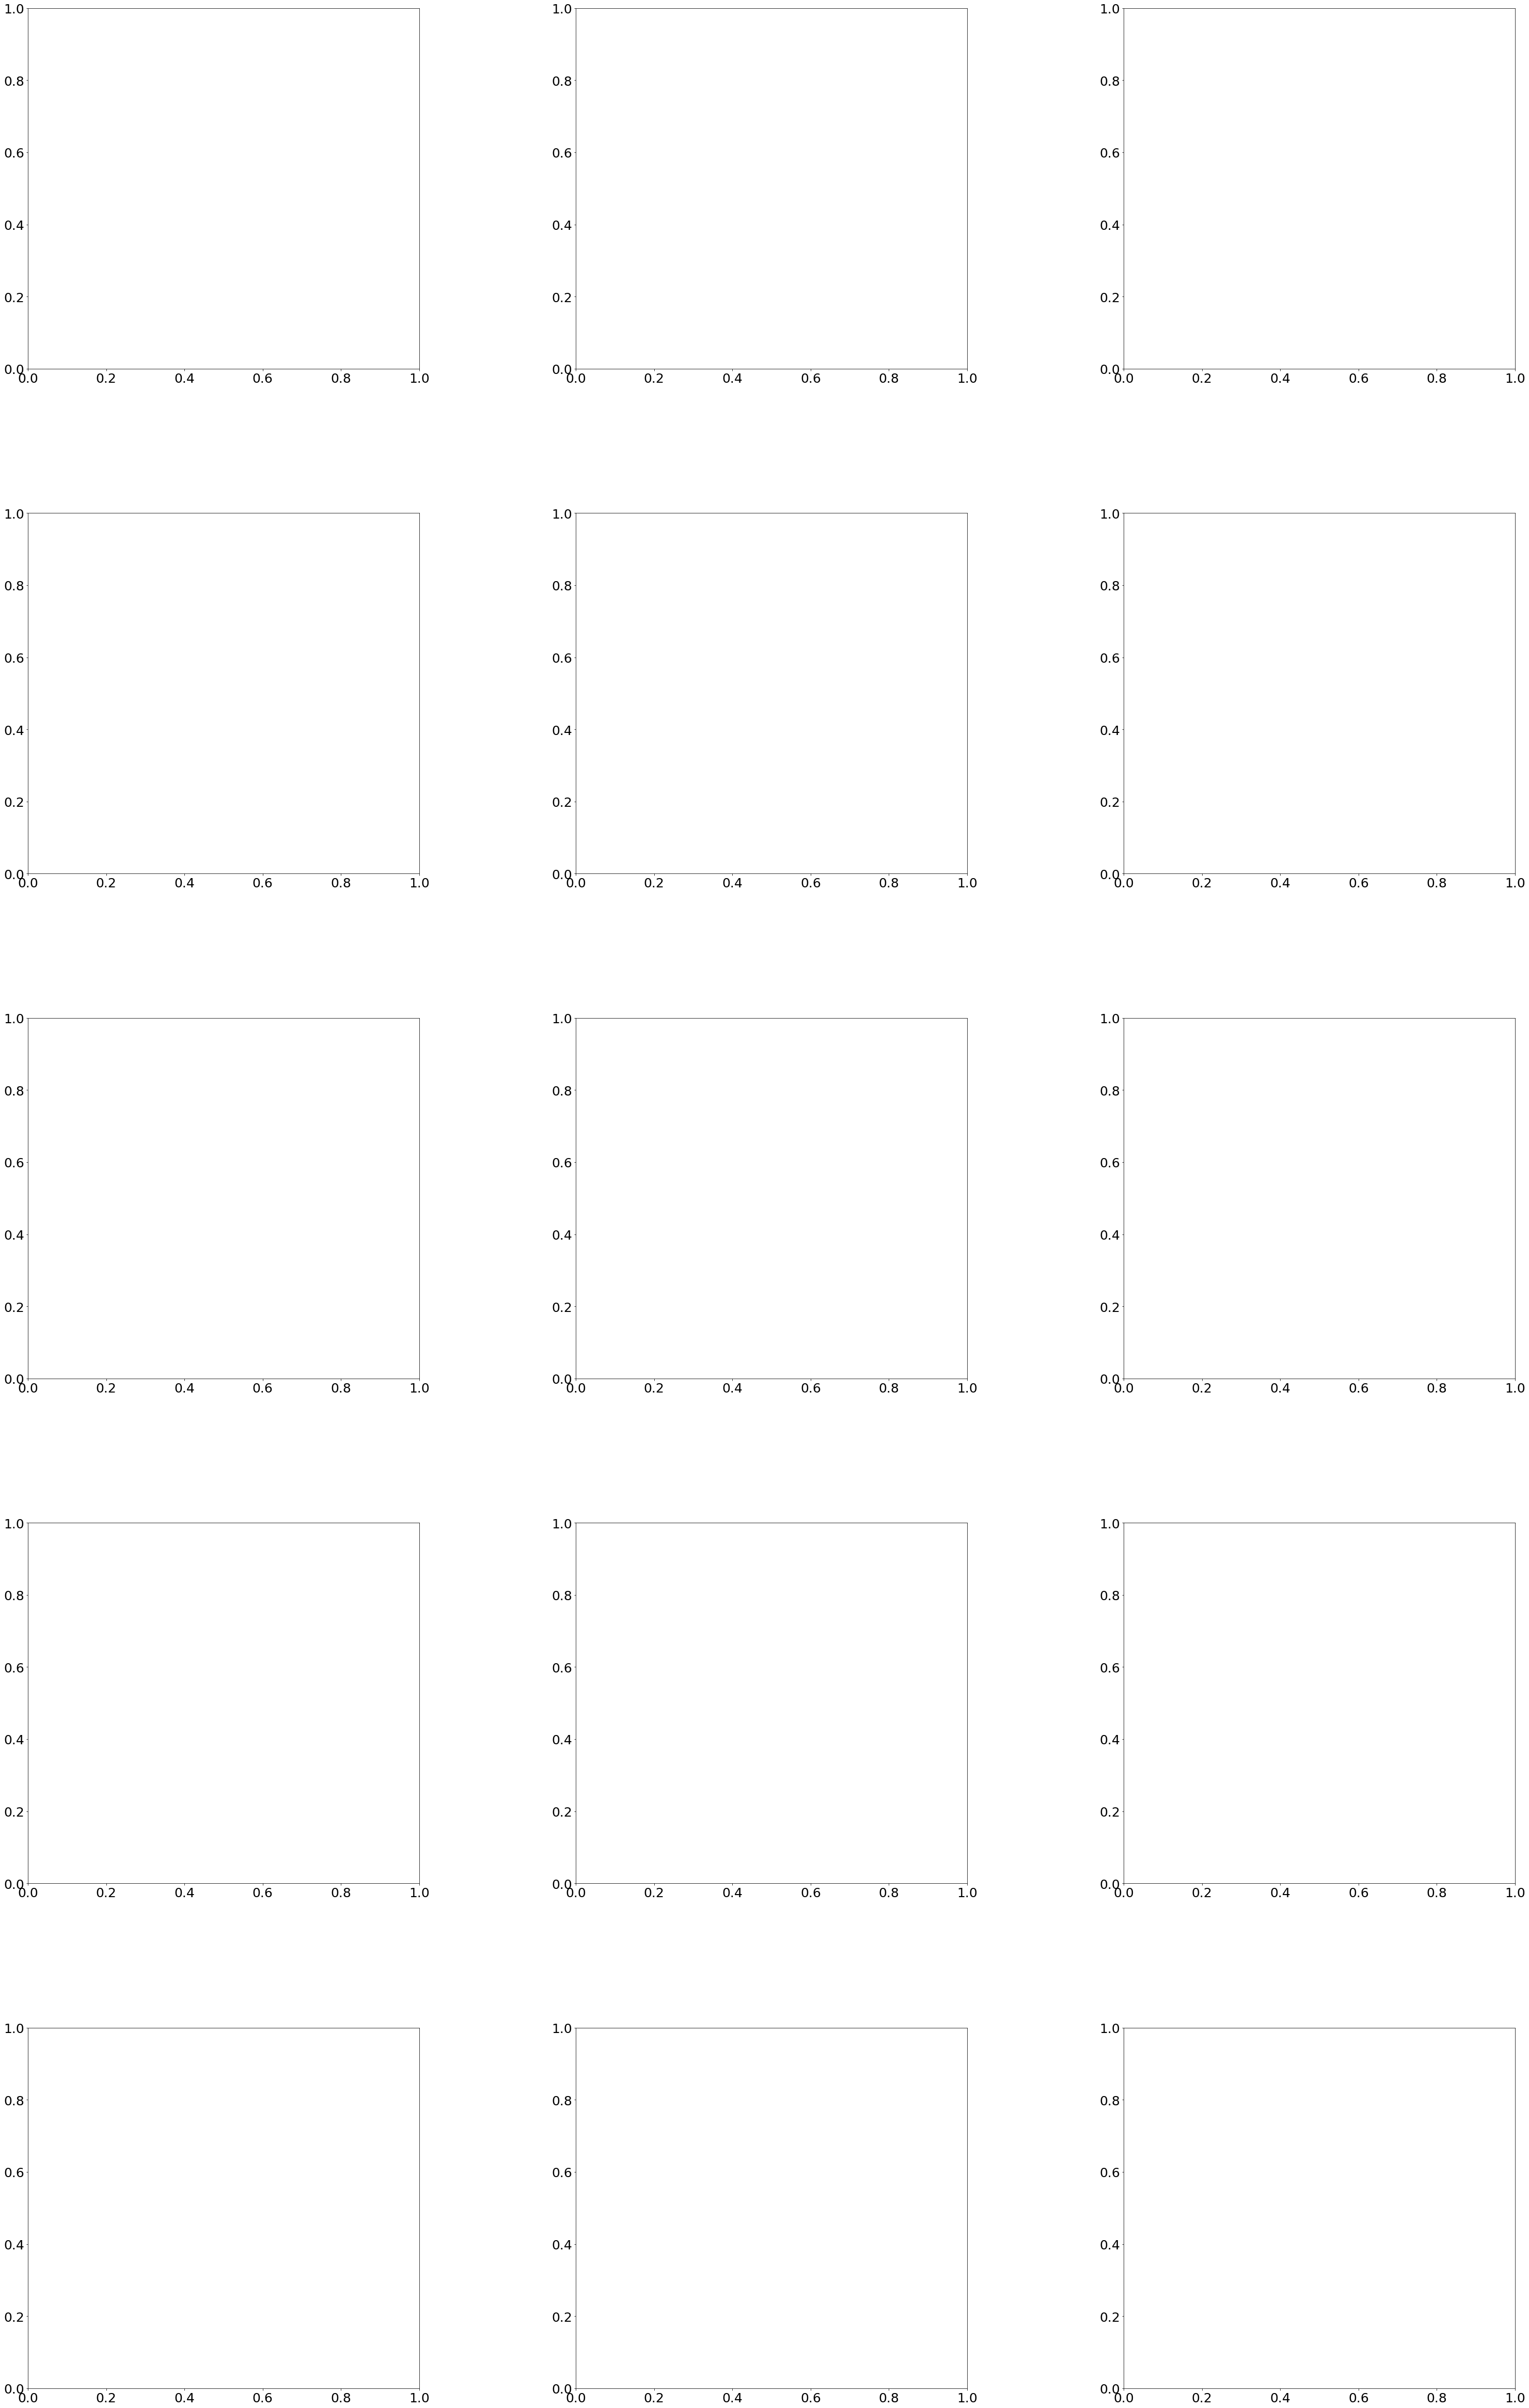

In [13]:
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/fewtraj_kitchen/"

fig, ((axs))= plt.subplots(numsam,3,figsize=(50,80))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=45

for i in range(numsam):
    filename= path+"vec_noada_x"+str(i)+".txt"
    q_noada,p_noada,g=openCfile_qp(filename)
    filename= path+"vec_tr_x"+str(i)+".txt"
    q_tr,p_tr,g=openCfile_qp(filename)
    filename= path+"vec_tr_g"+str(i)+".txt"
    g,p_trnone,gnone=openCfile_qp(filename)

    t=np.linspace(0,len(q_noada),len(q_noada))

    # Q
    ###6
    axs[i,0].plot(t,q_noada,"-",linewidth=lw,label='Underdamped SDE',color=myred)
    axs[i,0].plot(t,q_tr,"--",linewidth=lw,alpha=0.7,label='Transformed\nunderdamped SDE',color=myblue)
    axs[i,0].set_ylim(-3,3)
    axs[i,0].set_ylabel("q", fontsize=font_size)
    axs[i,0].set_xlabel("Number of steps", fontsize=font_size)



    ############
    ## P vals ## 
    ############

    axs[i,1].plot(t,p_noada,"-",linewidth=lw,label='Underdamped SDE',color=myred)
    axs[i,1].plot(t,p_tr,"--",linewidth=lw,alpha=0.7,label='Transformed\nunderdamped SDE',color=myblue)
    axs[i,1].set_ylabel("p", fontsize=font_size)
    axs[i,1].set_xlabel("Number of steps", fontsize=font_size)

    ############
    ## Histograms g vals ## 
    ############
    range_bins_g=[0,M+0.1]
    histogram_g,bins = np.histogram(g,bins=nbins,range=range_bins_g, density=True)
    midx_noada = (bins[0:-1]+bins[1:])/2
    mean_g=round(np.mean(g),2)

    axs[i,2].plot(t,g,linewidth=lw*2,label='Average step='+str(mean_g),color=mygrey)
    axs[i,2].legend(fontsize=font_size, loc="upper center")
    axs[i,2].set_ylabel("g", fontsize=font_size)
    axs[i,2].set_xlabel("Number of steps", fontsize=font_size)

axs[0,0].legend(fontsize=font_size,loc="upper center",ncol=3,bbox_to_anchor=(0.8, 1.42))

# os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/underdamped/visualisation")
# fig.savefig("figure/chains_anisotropic_under.eps",dpi=1000)
# fig.savefig("figure/chains_anisotropic_under.pdf")

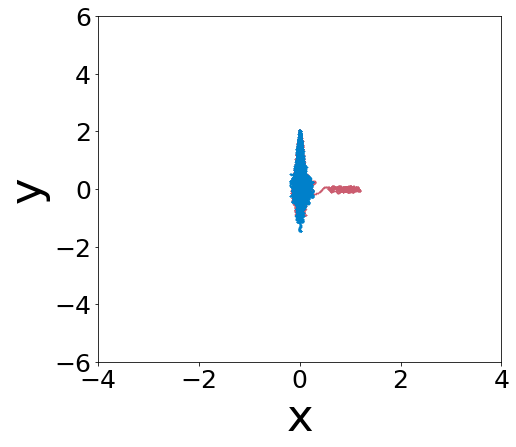

In [58]:
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/fewtraj_kitchen"
numsam=1
fig, ((axs))= plt.subplots(numsam,1,figsize=(7,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=45

for i in range(numsam):
    filename= path+"/vec_noada_x"+str(i)+".txt"
    q_noadax,p_noada,g=openCfile_qp(filename)
    filename= path+"/vec_tr_x"+str(i)+".txt"
    q_trx,p_tr,g=openCfile_qp(filename)
    filename= path+"/vec_tr_g"+str(i)+".txt"
    g,p_trnone,gnone=openCfile_qp(filename)


    filename= path+"/vec_noada_y"+str(i)+".txt"
    q_noaday,p_noada,g=openCfile_qp(filename)
    filename= path+"/vec_tr_y"+str(i)+".txt"
    q_try,p_tr,g=openCfile_qp(filename)
    filename= path+"/vec_tr_g"+str(i)+".txt"
    g,p_trnone,gnone=openCfile_qp(filename)

    ## plot every 5 values 
    evry_n=2
    q_noadax=q_noadax[::evry_n]
    q_noaday=q_noaday[::evry_n]   
    q_trx=q_trx[::evry_n]
    q_try=q_try[::evry_n]

    # Q
    ###
    axs.plot(q_noadax,q_noaday,"x",markersize=1,linewidth=lw,label='Underdamped SDE',color=myred)
    axs.plot(q_trx,q_try,"x",markersize=1,linewidth=lw,alpha=0.9,label='Transformed\nunderdamped SDE',color=myblue)
    # # # start point
    # # axs[i].plot(q_noadax[0],q_noaday[0],"o",markersize=10.,linewidth=lw,color=mygreen)
    # # axs[i].plot(q_trx[0],q_try[0],"o",markersize=10,linewidth=lw,label='Start',color=mygreen)
    # # #end point 
    # # axs[i].plot(q_noadax[-1],q_noaday[-1],"o",markersize=10.,linewidth=lw,color=myyellow)
    # # axs[i].plot(q_trx[-1],q_try[-1],"o",markersize=10,linewidth=lw,label='End',color=myyellow)

    axs.set_ylim(-6,6.)
    axs.set_xlim(-4,4)

    axs.set_xlabel("x", fontsize=font_size)
    axs.set_ylabel("y", fontsize=font_size)

    # axs[i].legend(fontsize=font_size/3,loc="upper right",ncol=1,bbox_to_anchor=(1.2, 1.42))



# Visualise few trajectories 


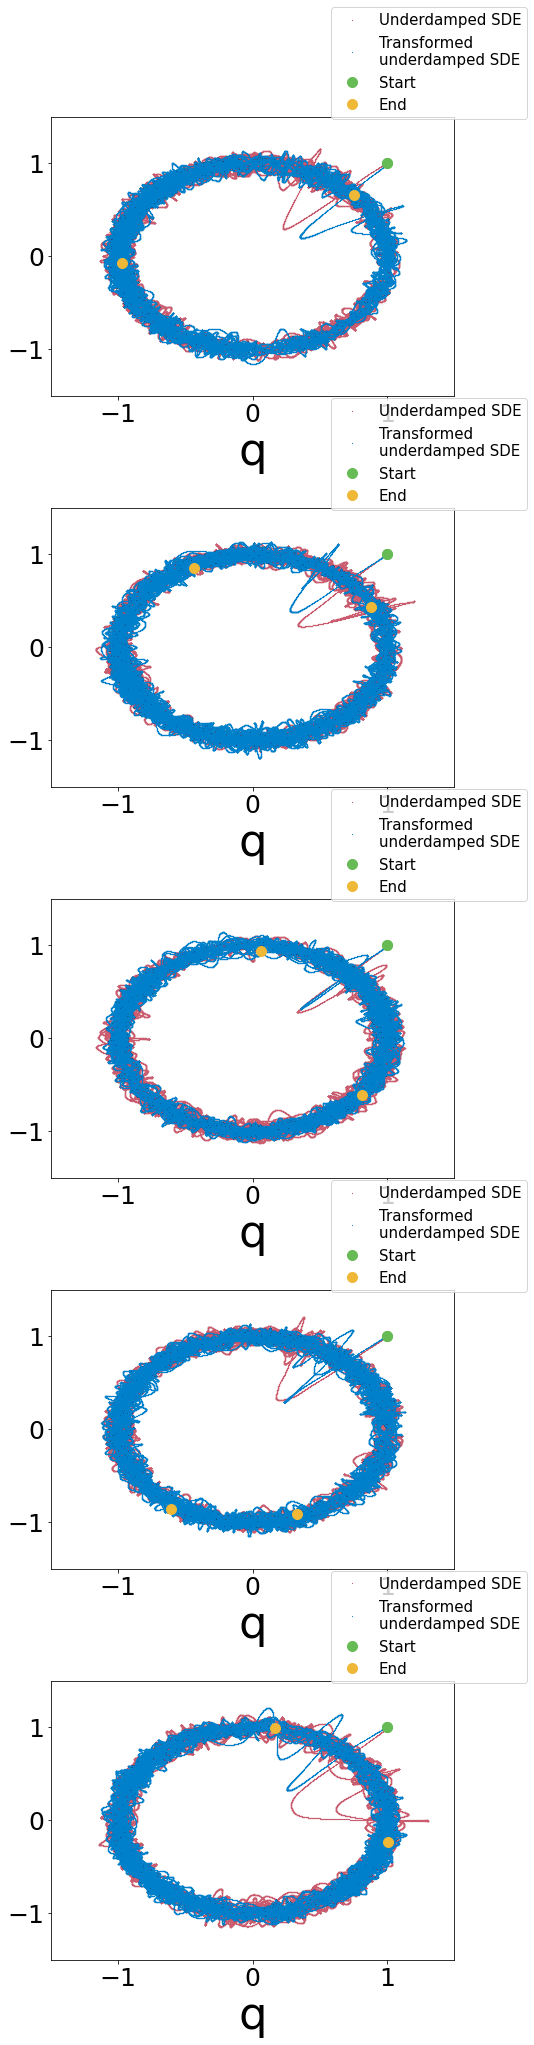

In [24]:
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/fewtraj2d")

fig, ((axs))= plt.subplots(numsam,1,figsize=(7,32))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=45

for i in range(numsam):
    filename= "vec_noada_x"+str(i)+".txt"
    q_noadax,p_noada,g=openCfile_qp(filename)
    filename= "vec_tr_x"+str(i)+".txt"
    q_trx,p_tr,g=openCfile_qp(filename)
    filename= "vec_tr_g"+str(i)+".txt"
    g,p_trnone,gnone=openCfile_qp(filename)


    filename= "vec_noada_y"+str(i)+".txt"
    q_noaday,p_noada,g=openCfile_qp(filename)
    filename= "vec_tr_y"+str(i)+".txt"
    q_try,p_tr,g=openCfile_qp(filename)
    filename= "vec_tr_g"+str(i)+".txt"
    g,p_trnone,gnone=openCfile_qp(filename)

    # Q
    ###
    axs[i].plot(q_noadax,q_noaday,"x",markersize=0.5,linewidth=lw,label='Underdamped SDE',color=myred)
    axs[i].plot(q_trx,q_try,"x",markersize=0.5,linewidth=lw,alpha=0.9,label='Transformed\nunderdamped SDE',color=myblue)
    # start point
    axs[i].plot(q_noadax[0],q_noaday[0],"o",markersize=10.,linewidth=lw,color=mygreen)
    axs[i].plot(q_trx[0],q_try[0],"o",markersize=10,linewidth=lw,label='Start',color=mygreen)
    #end point 
    axs[i].plot(q_noadax[-1],q_noaday[-1],"o",markersize=10.,linewidth=lw,color=myyellow)
    axs[i].plot(q_trx[-1],q_try[-1],"o",markersize=10,linewidth=lw,label='End',color=myyellow)

    axs[i].set_ylim(-1.5,1.5)
    axs[i].set_xlim(-1.5,1.5)

    axs[i].set_xlabel("q", fontsize=font_size)

    axs[i].legend(fontsize=font_size/3,loc="upper right",ncol=1,bbox_to_anchor=(1.2, 1.42))


## Look at the accuracy you obtain by plotting the accuracy on the different moments

Compute the moments


In [63]:
## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
import scipy.integrate as integrate

range_int=[-15,15]
a=range_int[0]
b=range_int[1]
s=0.1
# def U(x,y):
#     res=s*(x*x+y*y-1)*(x*x+y*y-1)
#     return res


def U(x,y):
    res=(d*x*x+0.001*(y-1)*(y-1))*((x-1)*(x-1)+b*y*y)
    return (res)

def target(x,y):
    return np.exp(-U(x,y)/tau)

def mom_3(x,y):
   return np.exp(-U(x,y)/tau)*U(x,y)
normalising_cst=integrate.dblquad(target,a,b,a,b)[0]
print(normalising_cst)
true_mom_3=integrate.dblquad(mom_3,a,b,a,b)[0]/normalising_cst
print(true_mom_3)
true_mom_1=0
true_mom_2=0
def mom_4(x,y):
   return np.exp(-U(x,y)/tau)*y*y

def mom_5(x,y):
   return np.exp(-U(x,y)/tau)*x*x

true_mom_4=integrate.dblquad(mom_4,a,b,a,b)[0]/normalising_cst
true_mom_5=integrate.dblquad(mom_5,a,b,a,b)[0]/normalising_cst
print(true_mom_4)
print(true_mom_5)



0.15633050759195025


/home/s2133976/.local/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


0.061479779762838374
0.5133587117612631
0.0


In [62]:
#######################################################
##### read file from c code
#######################################################
def openCfile(file):
    """
    Open the C txt file in order to obtain a matrix of results 
    -----------
    Input
    -----------
    file: txt file
        a file containing the results from the C simulation

    Return
    -----------
    mat: list of list
        A matrix containing the results of the simulations 
    """
    with open(file) as f:
        cols = f.readlines() #columns in the txt file
    n_col = len(cols) #number of columns in the text file
    mat=[] # matrix 
    for i in range(n_col): # for each columns 
        elems_i=cols[i].split(" ") #split the elements using " "
        col_i=[] #create an empty column i 
        for elem in elems_i: #for each element of the list 
            if elem!="\n" and elem!=" ": #compare each elements and discard " " and "\n"
                col_i.append(float(elem)) #append elems that are floats to the vector of interest
        mat.append(col_i) #create the matrix
    mat=np.array(mat)
    return(mat) #return the value of the matrix.


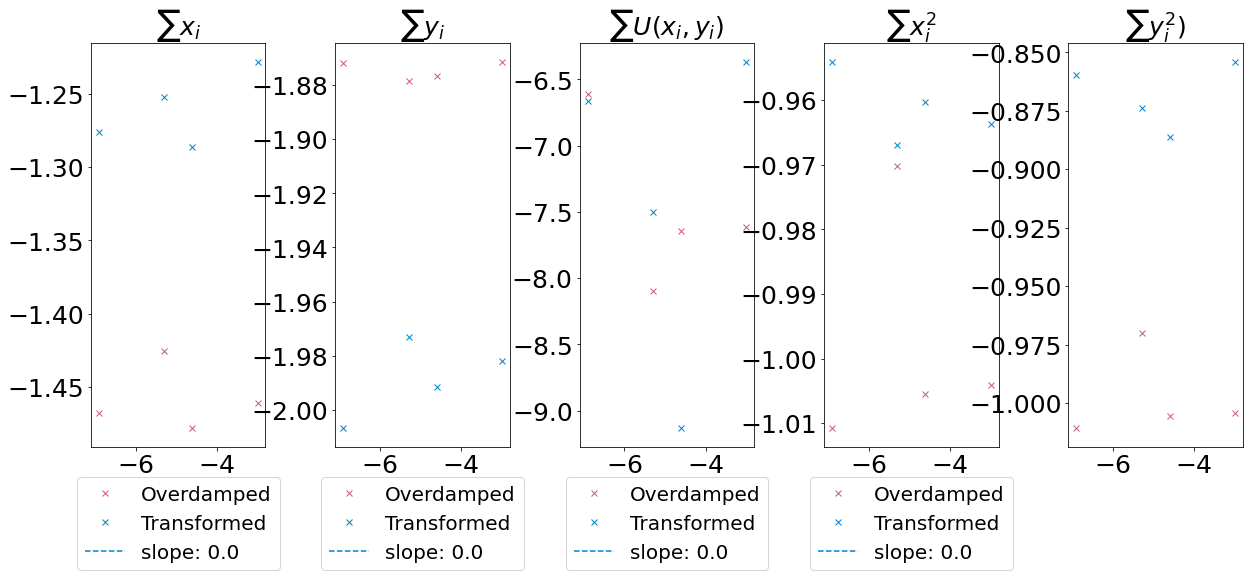

In [66]:
# ###########################################
# ## Set up the path
# ###########################################
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/kitchen_2d"

dtlist=np.array([0.001,0.005,0.01,0.05]) #//# , 0.531, 0.741, 1.034, 1.443, 2.014])
# ###########################################
# ## Interpolate the slope
# ###########################################
xm= np.log(dtlist)
lb=0
ub=-5
x = np.log(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4,ax5)= plt.subplots(1,5,figsize=(20,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax1.set_title("$\\sum x_i$",fontsize=font_size)
ax2.set_title("$\\sum y_i$",fontsize=font_size)
ax3.set_title("$\\sum U(x_i,y_i)$",fontsize=font_size)
ax4.set_title("$\\sum x^2_i$",fontsize=font_size)
ax5.set_title("$\\sum y^2_i)$",fontsize=font_size)

# ax4.set_title("Average value taken by g",fontsize=font_size)

## no adaptive 
###############
lab="Overdamped"

# Upload moments
mom1_list=np.hstack(openCfile(path+"/noada_moment1.txt"))
mom2_list=np.hstack(openCfile(path+"/noada_moment2.txt"))
mom3_list=np.hstack(openCfile(path+"/noada_moment3.txt"))
mom4_list=np.hstack(openCfile(path+"/noada_moment4.txt"))
mom5_list=np.hstack(openCfile(path+"/noada_moment5.txt"))

# mom4_list=np.hstack(openCfile("overdamped_2d/noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)
mom5_list=np.abs(mom5_list-true_mom_5)


#Plot moments
ax1.plot(xm,np.log(mom1_list),"x",color=myred,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myred,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myred,label=lab)
ax4.plot(xm,np.log(mom5_list),"x",color=myred,label=lab)
ax5.plot(xm,np.log(mom5_list),"x",color=myred,label=lab)

# ax4.plot(xm,np.log(mom4_list),"x",color=myred,label=lab)


## Transformed 
###############
lab="Transformed"

# Upload moments
mom1_list=np.hstack(openCfile(path+"/tr_moment1.txt"))
mom2_list=np.hstack(openCfile(path+"/tr_moment2.txt"))
mom3_list=np.hstack(openCfile(path+"/tr_moment3.txt"))
mom4_list=np.hstack(openCfile(path+"/tr_moment4.txt"))
mom5_list=np.hstack(openCfile(path+"/tr_moment5.txt"))

g_vals=np.hstack(openCfile(path+"/tr_moment6.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)
mom5_list=np.abs(mom5_list-true_mom_5)

ax1.plot(xm,np.log(mom1_list),"x",color=myblue,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myblue,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myblue,label=lab)
ax4.plot(xm,np.log(mom4_list),"x",color=myblue,label=lab)
ax5.plot(xm,np.log(mom5_list),"x",color=myblue,label=lab)

# ax5.plot(xm,g_vals,"-",color=mygrey,label=lab)


## interpolation linear  
#first moment
m, c = np.linalg.lstsq(A, np.log(mom1_list)[lb:ub], rcond=None)[0]
ax1.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#second moment
m, c = np.linalg.lstsq(A, np.log(mom2_list)[lb:ub], rcond=None)[0]
ax2.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#third moment
m, c = np.linalg.lstsq(A, np.log(mom3_list)[lb:ub], rcond=None)[0]
ax3.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#fourth moment
m, c = np.linalg.lstsq(A, np.log(mom4_list)[lb:ub], rcond=None)[0]
ax4.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#fifth moment
m, c = np.linalg.lstsq(A, np.log(mom5_list)[lb:ub], rcond=None)[0]
ax5.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)


ax1.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax2.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax3.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax4.legend(fontsize=font_size*0.8,ncol=1,loc="upper center",bbox_to_anchor=(0.5, -0.05))

# os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations")

# ax1.set_ylim(-8,2)
# ax2.set_ylim(-8,2)
# ax3.set_ylim(-8,2)
# ax4.set_ylim(0.7,1.3)

# fig.savefig("figures/moments_logplot_overdamped_2d.eps")

